In [1]:
# Import library Numpy & Pandas
import numpy as np
import pandas as pd

In [2]:
# import dataset iris
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
print(iris.data.shape)

(150, 4)


jumlah baris: 150 baris, jumlah kolom: 4 kolom

In [4]:
# Mengubah data ke dalam dataframe
dataset_iris = load_iris(as_frame = True)

In [5]:
dataset_iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
# Melihat deskrispsi statistic data
dataset_iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Mengambil sample data (random sampling)
dataset_iris.data.sample(n=3, random_state=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4


In [8]:
# Mengambil sample data (representative sampling)
import random

dataset_iris.data.sample(n=10, random_state = random.randint(0,5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [9]:
# cara lain melakukan sampling adalah dengan representative sampling
dataset_iris.data.sample(n=10, replace=True, random_state=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
37,4.9,3.6,1.4,0.1
140,6.7,3.1,5.6,2.4
72,6.3,2.5,4.9,1.5
137,6.4,3.1,5.5,1.8
133,6.3,2.8,5.1,1.5
79,5.7,2.6,3.5,1.0
144,6.7,3.3,5.7,2.5
129,7.2,3.0,5.8,1.6
71,6.1,2.8,4.0,1.3
134,6.1,2.6,5.6,1.4


In [10]:
# import matplotlib
from matplotlib import pyplot as plt

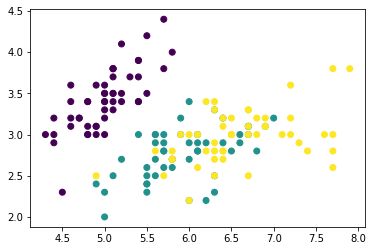

In [11]:
# Melihat penyebaran data berdasarkan Sepal
plt.scatter(dataset_iris.data['sepal length (cm)'], dataset_iris.data['sepal width (cm)'], c=dataset_iris.target)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

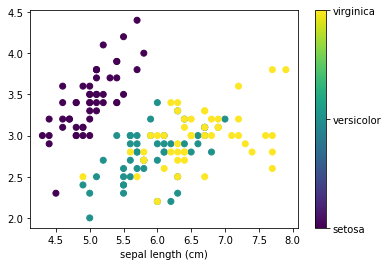

In [12]:
# Menambahkan FuncFormatter
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(dataset_iris.data['sepal length (cm)'], dataset_iris.data['sepal width (cm)'], c=dataset_iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal length (cm)')
plt.ylabel

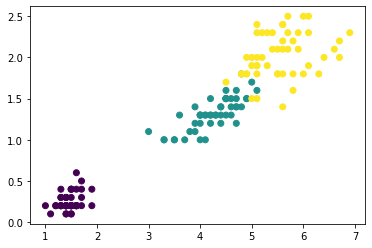

In [13]:
plt.scatter(dataset_iris.data['petal length (cm)'], dataset_iris.data['petal width (cm)'], c=dataset_iris.target)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

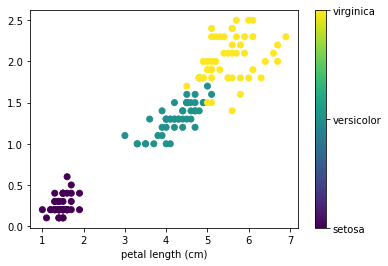

In [14]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(dataset_iris.data['petal length (cm)'], dataset_iris.data['petal width (cm)'], c=dataset_iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('petal length (cm)')
plt.ylabel

In [19]:
# Membagi data training dan testing dengan Scikit-Learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_iris.data, dataset_iris.target, test_size=0.33, random_state=42)

### Data Modeling - Logistic Regression

In [16]:
dataset_iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
print("Logistic Regression Model Accuracy: ", logreg.score(X_test, y_test) * 100, "%")

Logistic Regression Model Accuracy:  100.0 %


### Evaluation

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

pred = logreg.predict(X_test)
print(pred)

#Print precision, recall, and f1-score
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


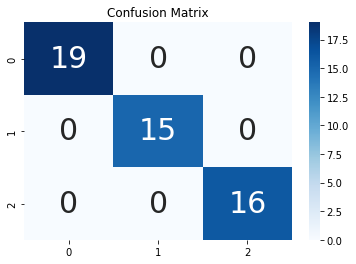

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()